<a href="https://colab.research.google.com/github/C0ntinue/pytorch_tutorial/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [11]:
arr = [1, 2, 3, 4, 5]
nparr = np.array(arr)
nparr2 = np.array((1, 2, 3, 4, 5))
print(nparr)
print(nparr2)

[1 2 3 4 5]
[1 2 3 4 5]


In [22]:
nparr3=np.array([nparr,nparr2])
print(nparr3)
r,c = np.shape(nparr3)
print(r, c)
for i in range(r):
  for j in range(c):
    print(nparr3[i][j])

[[1 2 3 4 5]
 [1 2 3 4 5]]
2 5
1
2
3
4
5
1
2
3
4
5


In [50]:
x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[2],[4],[6]])


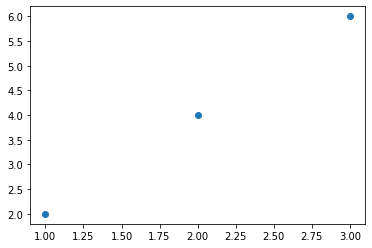

In [51]:
plt.scatter(x_train, y_train)

In [33]:
x = np.linspace(0,10,11)
y = np.linspace(0, 10, 11)

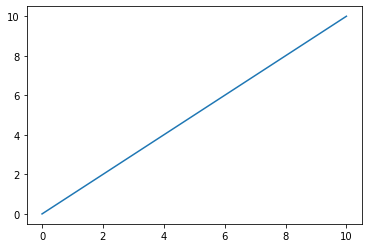

In [34]:
plt.plot(x,y)

In [52]:
W = torch.zeros(1, requires_grad=True)
print(W)

tensor([0.], requires_grad=True)


In [53]:
b = torch.zeros(1, requires_grad=True)
print(b)

tensor([0.], requires_grad=True)


In [54]:
hypothesis = x_train* W + b

In [56]:
cost = torch.mean((hypothesis-y_train)**2)
print(cost)

tensor(18.6667, grad_fn=<MeanBackward0>)


In [58]:
optimizer = optim.SGD([W, b], lr = 0.01)

In [60]:
optimizer.zero_grad() #gradient 초기화
cost.backward() #cost의 기울기 계산
optimizer.step() #W와 b 업데이트

In [64]:
num_epochs = 1000
for epoch in range(num_epochs):
  hypothesis = x_train* W + b
  cost = torch.mean((hypothesis-y_train)**2)
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch%100 == 0:
    print('Epoch{:4d}/{} W:{:}, b:{:}, Cost:{:.6f}'.format(epoch,num_epochs, W.item(),b.item(),cost.item()))


Epoch   0/1000 W:0.6318292617797852, b:0.26951324939727783, Cost:9.257346
Epoch 100/1000 W:1.7475242614746094, b:0.5739148259162903, Cost:0.047480
Epoch 200/1000 W:1.8015373945236206, b:0.45115214586257935, Cost:0.029340
Epoch 300/1000 W:1.8439903259277344, b:0.35464680194854736, Cost:0.018130
Epoch 400/1000 W:1.8773620128631592, b:0.27878478169441223, Cost:0.011203
Epoch 500/1000 W:1.9035956859588623, b:0.21914993226528168, Cost:0.006923
Epoch 600/1000 W:1.9242174625396729, b:0.17227165400981903, Cost:0.004278
Epoch 700/1000 W:1.9404281377792358, b:0.13542114198207855, Cost:0.002644
Epoch 800/1000 W:1.953170895576477, b:0.10645339637994766, Cost:0.001634
Epoch 900/1000 W:1.9631880521774292, b:0.08368218690156937, Cost:0.001009


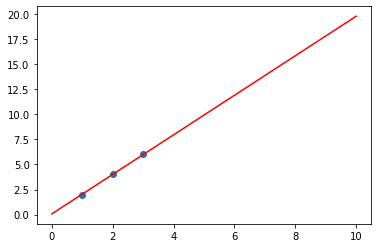

In [71]:
W2= W.detach().numpy()
b2= b.detach().numpy()
plt.plot(x,W2*x+b2, 'r')
plt.scatter(x_train, y_train)